# **KAU Deep Learning (Spring 2021)**
### Sequence Modeling with RNNs (In-class activity for Week 14)

**NOTE**
Some descriptions & codes from the below resources:
1. [Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
2. https://www.tensorflow.org/guide/keras/rnn
3. https://www.kaggle.com/mczielinski/bitcoin-historical-data
4. IT CookBook, 파이썬으로 만드는 인공지능 | 한및아카데미 | 오일석, 이진선

---

## Bitcoin Price Prediction
### 1. Get the data
#### Bitcoin Historical Data
#### Export the bitcoin data from the coindesk website (https://www.coindesk.com/price/bitcoin)

To upload from your local drive, start with the following code:

In [3]:
from google.colab import files
uploaded = files.upload()

Saving BTC_USD_2013-10-01_2021-06-03-CoinDesk.csv to BTC_USD_2013-10-01_2021-06-03-CoinDesk (1).csv


In [4]:
!ls -al
!pwd

total 368
drwxr-xr-x 1 root root   4096 Jun  3 09:18  .
drwxr-xr-x 1 root root   4096 Jun  3 05:44  ..
-rw-r--r-- 1 root root 179845 Jun  3 09:18 'BTC_USD_2013-10-01_2021-06-03-CoinDesk (1).csv'
-rw-r--r-- 1 root root 179845 Jun  3 05:48  BTC_USD_2013-10-01_2021-06-03-CoinDesk.csv
drwxr-xr-x 4 root root   4096 Jun  1 13:40  .config
drwxr-xr-x 1 root root   4096 Jun  1 13:40  sample_data
/content


data length: 2803
The first 5 data:
 [[123.65499 124.30466 124.75166 122.56349]
 [125.455   123.65499 125.7585  123.63383]
 [108.58483 125.455   125.66566  83.32833]
 [118.67466 108.58483 118.675   107.05816]
 [121.33866 118.67466 121.93633 118.00566]]


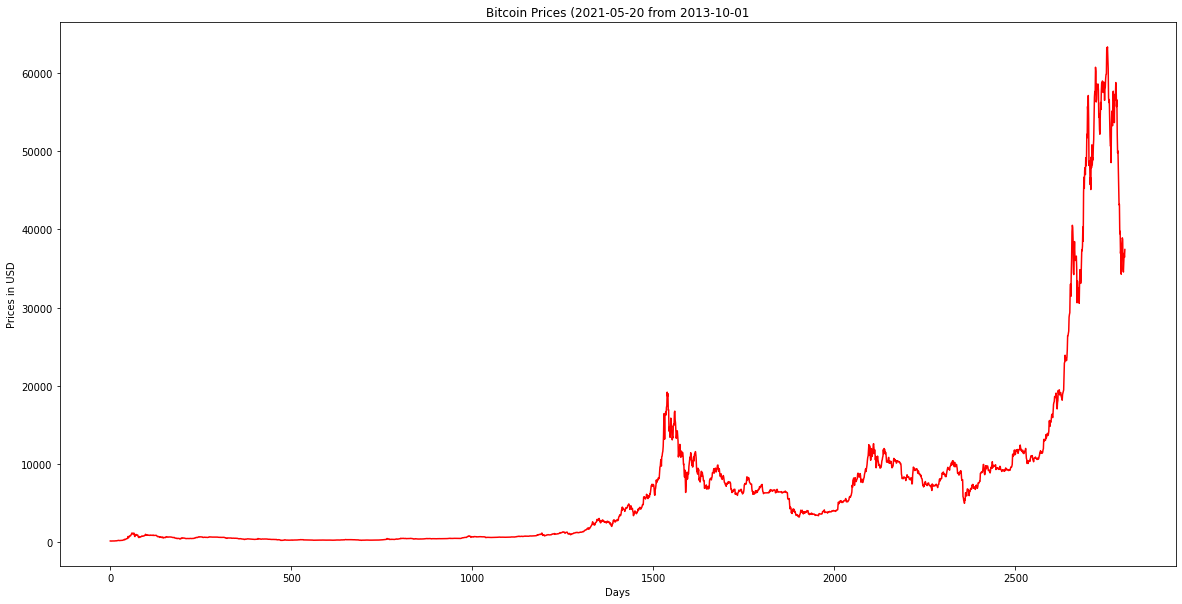

In [5]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

f = open('BTC_USD_2013-10-01_2021-06-03-CoinDesk.csv','r')
coindesk_data = pd.read_csv(f,header=0)
seq = coindesk_data[['Closing Price (USD)','24h Open (USD)', '24h High (USD)', '24h Low (USD)']].to_numpy()
data_length = len(seq)
print('data length:', data_length)
print('The first 5 data:\n', seq[:5])

# plotting
plt.figure(figsize=(20,10))
plt.plot(seq[:,0],color='red')
plt.title('Bitcoin Prices (2021-05-20 from 2013-10-01')
plt.xlabel('Days')
plt.ylabel('Prices in USD')
plt.show()

### Split the Dataset

In [6]:
import numpy as np

def seq2dataset(seq, window, horizon):
  X=[]
  Y=[]
  for i in range(len(seq)-(window + horizon) + 1):
    x = seq[i:(i + window)]
    y = (seq[i + window + horizon - 1])
    X.append(x); Y.append(y)
  
  return np.array(X), np.array(Y)

#w = 7 # a week
w = 30 # a month
#w = 90 # three months
h = 1

X, Y = seq2dataset(seq,w,h)
print(X.shape, Y.shape)
print(X[0], Y[0])

(2773, 30, 4) (2773, 4)
[[123.65499 124.30466 124.75166 122.56349]
 [125.455   123.65499 125.7585  123.63383]
 [108.58483 125.455   125.66566  83.32833]
 [118.67466 108.58483 118.675   107.05816]
 [121.33866 118.67466 121.93633 118.00566]
 [120.65533 121.33866 121.85216 120.5545 ]
 [121.795   120.65533 121.99166 120.43199]
 [123.033   121.795   123.64016 121.35066]
 [124.049   123.033   124.7835  122.59266]
 [125.96116 124.049   128.01683 123.81966]
 [125.27966 125.96116 126.43666 124.11383]
 [125.9275  125.27966 126.0365  123.12966]
 [126.38333 125.9275  126.8965  125.2765 ]
 [135.24199 126.38333 135.24199 126.255  ]
 [133.20333 135.24199 135.69216 130.39275]
 [142.76333 133.20333 143.60483 132.94933]
 [137.92333 142.76333 145.601   136.01466]
 [142.95166 137.92333 144.311   137.53966]
 [152.55183 142.95166 152.6685  142.47949]
 [160.33883 152.55183 167.07999 152.5135 ]
 [164.31499 160.33883 164.3315  159.89666]
 [177.63333 164.31499 177.71166 163.87149]
 [188.29716 177.63333 188.8238

In [7]:
# Split the dataset
split_train = int(len(X)*0.7)
split_valid = int(len(X)*0.9)
# Train
#X_train = X[:split_train]; y_train=Y[:split_train]
X_train = X[:split_train, :, [0]]; y_train=Y[:split_train, [0]]
# Valid
#X_valid = X[split_train:split_valid]; y_valid=Y[split_train:split_valid]
X_valid = X[split_train:split_valid,:, [0]]; y_valid=Y[split_train:split_valid,[0]]
# Test
#X_test = X[split_valid:]; y_test=Y[split_valid:]
X_test = X[split_valid:,:, [0]]; y_test=Y[split_valid:,[0]]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(1941, 30, 1) (1941, 1)
(554, 30, 1) (554, 1)
(278, 30, 1) (278, 1)


Linear predictions:

In [123]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[w, 1]),
    keras.layers.Dense(1)
])

# The default learning rate is 0.01 and no momentum is used by default.
# https://keras.io/api/optimizers/adam/
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Epoch 1/200
61/61 [==============================] - 0s 3ms/step - loss: 24765044.0000 - val_loss: 13564031.0000
Epoch 2/200
61/61 [==============================] - 0s 1ms/step - loss: 1463729.6250 - val_loss: 1161371.7500
Epoch 3/200
61/61 [==============================] - 0s 2ms/step - loss: 674789.1250 - val_loss: 1122424.3750
Epoch 4/200
61/61 [==============================] - 0s 2ms/step - loss: 664274.4375 - val_loss: 1101961.3750
Epoch 5/200
61/61 [==============================] - 0s 1ms/step - loss: 643995.0625 - val_loss: 1107524.3750
Epoch 6/200
61/61 [==============================] - 0s 2ms/step - loss: 640100.9375 - val_loss: 1055129.1250
Epoch 7/200
61/61 [==============================] - 0s 2ms/step - loss: 621140.7500 - val_loss: 1046717.3125
Epoch 8/200
61/61 [==============================] - 0s 2ms/step - loss: 603870.8750 - val_loss: 1008448.5625
Epoch 9/200
61/61 [==============================] - 0s 2ms/step - loss: 589084.6875 - val_loss: 1000698.5625
Epoch 

In [124]:
model.evaluate(X_valid, y_valid)

18/18 [==============================] - 0s 2ms/step - loss: 436100.2812


436100.28125

In [8]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#####################################################
## plot utility functions
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 200, 10000, 1000000])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MSE)")
    plt.grid(True)

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    #plt.hlines(0, 0, 100, linewidth=1)
    #plt.axis([0, n_steps + 1, -1, 1])

Learning curve:

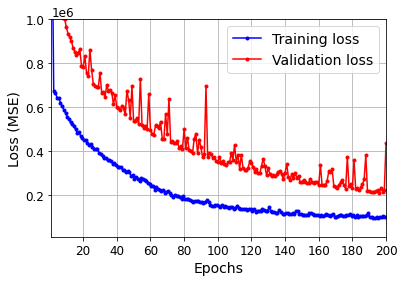

In [126]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

(554, 30, 1)
(554, 1)
gt: [3933.60758963]
pred: [3666.009]


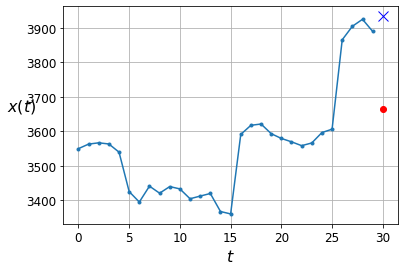

In [128]:
n_steps = 30

print(X_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

print("gt:", y_valid[0]) # blue
print("pred:", y_pred[0]) # red

plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

##2. Using a Simple RNNs

In [29]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, activation='relu', input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(learning_rate=0.003)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Epoch 1/200
61/61 [==============================] - 1s 9ms/step - loss: 7185886.5000 - val_loss: 18439182.0000
Epoch 2/200
61/61 [==============================] - 0s 6ms/step - loss: 3620374.0000 - val_loss: 11398305.0000
Epoch 3/200
61/61 [==============================] - 0s 5ms/step - loss: 2246463.0000 - val_loss: 6772613.5000
Epoch 4/200
61/61 [==============================] - 0s 5ms/step - loss: 1353569.2500 - val_loss: 3899398.0000
Epoch 5/200
61/61 [==============================] - 0s 5ms/step - loss: 799143.1875 - val_loss: 2084373.0000
Epoch 6/200
61/61 [==============================] - 0s 5ms/step - loss: 473293.2500 - val_loss: 1100780.6250
Epoch 7/200
61/61 [==============================] - 0s 5ms/step - loss: 299591.6250 - val_loss: 612253.6875
Epoch 8/200
61/61 [==============================] - 0s 5ms/step - loss: 215180.0156 - val_loss: 379016.5625
Epoch 9/200
61/61 [==============================] - 0s 5ms/step - loss: 178866.0312 - val_loss: 284079.5312
Epoch 1

In [30]:
model.evaluate(X_valid, y_valid)

18/18 [==============================] - 0s 2ms/step - loss: 105151.1875


105151.1875

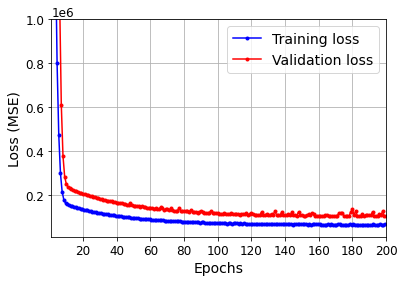

In [31]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

(554, 30, 1)
(554, 1)
gt: [3933.60758963]
pred: [3908.5247]


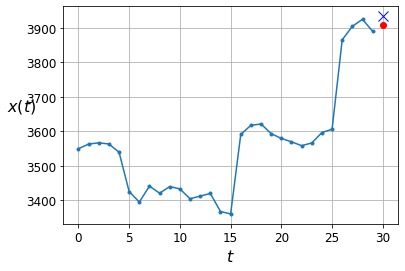

In [32]:
n_steps = 30

print(X_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

print("gt:", y_valid[0]) # blue
print("pred:", y_pred[0]) # red

plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

##3. Deep(?) RNNs

In [36]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, activation='relu', return_sequences=True,input_shape=[None, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.SimpleRNN(20, activation='relu',return_sequences=True),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.003)
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Epoch 1/200
61/61 [==============================] - 3s 18ms/step - loss: 18090784.0000 - val_loss: 75117584.0000
Epoch 2/200
61/61 [==============================] - 1s 13ms/step - loss: 18068848.0000 - val_loss: 75010472.0000
Epoch 3/200
61/61 [==============================] - 1s 14ms/step - loss: 18051622.0000 - val_loss: 75009632.0000
Epoch 4/200
61/61 [==============================] - 1s 13ms/step - loss: 18032224.0000 - val_loss: 74936320.0000
Epoch 5/200
61/61 [==============================] - 1s 13ms/step - loss: 18011140.0000 - val_loss: 74831208.0000
Epoch 6/200
61/61 [==============================] - 1s 13ms/step - loss: 17985342.0000 - val_loss: 74743568.0000
Epoch 7/200
61/61 [==============================] - 1s 13ms/step - loss: 17956592.0000 - val_loss: 74573608.0000
Epoch 8/200
61/61 [==============================] - 1s 13ms/step - loss: 17923320.0000 - val_loss: 74400000.0000
Epoch 9/200
61/61 [==============================] - 1s 13ms/step - loss: 17886900.0000 

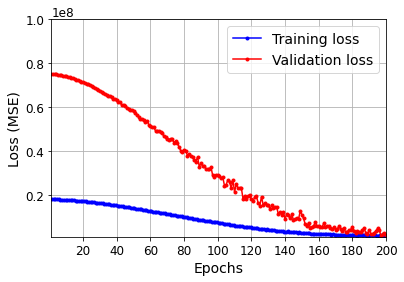

In [38]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.axis([1, 200, 1000000, 100000000])
plt.show()

(554, 30, 1)
(554, 30, 1)
gt: [3933.60758963]
pred: [[3500.706 ]
 [3749.7893]
 [3668.7788]
 [3670.171 ]
 [3676.7922]
 [3548.9863]
 [3504.2612]
 [3498.9014]
 [3491.3953]
 [3481.5947]
 [3478.4177]
 [3462.527 ]
 [3454.8855]
 [3459.3328]
 [3440.33  ]
 [3422.6907]
 [3599.4785]
 [3646.271 ]
 [3655.6506]
 [3644.9897]
 [3645.213 ]
 [3638.416 ]
 [3632.8916]
 [3628.8955]
 [3639.58  ]
 [3649.4622]
 [3841.7456]
 [3906.7341]
 [3931.3809]
 [3928.1943]]


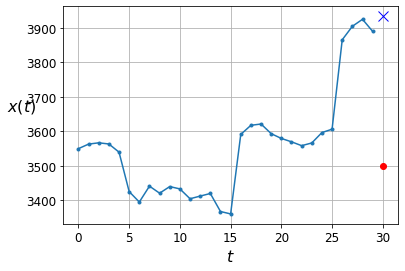

In [39]:
n_steps = 30

print(X_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

print("gt:", y_valid[0]) # blue
print("pred:", y_pred[0]) # red

plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

##4. LSTMs

In [43]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.LSTM(128, activation='relu', input_shape=[None, 1]),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.003)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Epoch 1/200
61/61 [==============================] - 3s 36ms/step - loss: 8354289.0000 - val_loss: 53589188.0000
Epoch 2/200
61/61 [==============================] - 2s 33ms/step - loss: 67646728.0000 - val_loss: 29605116.0000
Epoch 3/200
61/61 [==============================] - 2s 32ms/step - loss: 12458353.0000 - val_loss: 4279868.0000
Epoch 4/200
61/61 [==============================] - 2s 33ms/step - loss: 2791805.2500 - val_loss: 13023689.0000
Epoch 5/200
61/61 [==============================] - 2s 33ms/step - loss: 2449980.0000 - val_loss: 2842151.5000
Epoch 6/200
61/61 [==============================] - 2s 34ms/step - loss: 1574091.2500 - val_loss: 2865462.0000
Epoch 7/200
61/61 [==============================] - 2s 32ms/step - loss: 1407442.0000 - val_loss: 1794374.6250
Epoch 8/200
61/61 [==============================] - 2s 33ms/step - loss: 1187967.0000 - val_loss: 2802685.7500
Epoch 9/200
61/61 [==============================] - 2s 33ms/step - loss: 1142628.6250 - val_loss: 

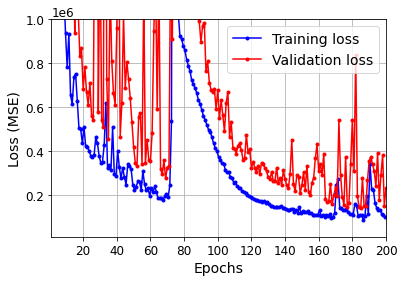

In [44]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

(554, 30, 1)
(554, 1)
gt: [3933.60758963]
pred: [3751.8875]


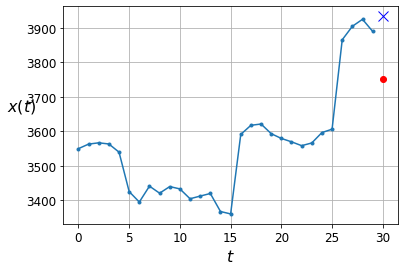

In [45]:
n_steps = 30

print(X_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

print("gt:", y_valid[0]) # blue
print("pred:", y_pred[0]) # red

plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

## Forecasting Several Steps Ahead

In [78]:
def seq2dataset_long(seq, window, horizon):
  X=[]
  Y=[]
  for i in range(len(seq)-(window + horizon) + 1):
    x = seq[i:(i + window)]
    y = seq[i + window:i + window + horizon]
    X.append(x); Y.append(y)
  return np.array(X), np.array(Y)

w = 30
h = 7

X, Y = seq2dataset_long(seq,w,h)
print(X.shape, Y.shape)
#print(X[0], Y[0])

# Split the dataset
split_train = int(len(X)*0.8)

# Train
X_train = X[:split_train, :, [0]]; y_train=Y[:split_train, :, [0]]
# Valid
X_valid = X[split_train:,:, [0]]; y_valid=Y[split_train:,:,[0]]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(2767, 30, 4) (2767, 7, 4)
(2213, 30, 1) (2213, 7, 1)
(554, 30, 1) (554, 7, 1)


In [80]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.SimpleRNN(7, activation='relu', input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(learning_rate=0.002)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Epoch 1/200
70/70 [==============================] - 1s 9ms/step - loss: 16139841.0000 - val_loss: 404844160.0000
Epoch 2/200
70/70 [==============================] - 0s 6ms/step - loss: 10297287.0000 - val_loss: 251278976.0000
Epoch 3/200
70/70 [==============================] - 0s 6ms/step - loss: 7913340.5000 - val_loss: 225953840.0000
Epoch 4/200
70/70 [==============================] - 0s 7ms/step - loss: 7528898.0000 - val_loss: 221109056.0000
Epoch 5/200
70/70 [==============================] - 0s 7ms/step - loss: 7440050.0000 - val_loss: 220425072.0000
Epoch 6/200
70/70 [==============================] - 0s 7ms/step - loss: 7425818.0000 - val_loss: 219759280.0000
Epoch 7/200
70/70 [==============================] - 0s 7ms/step - loss: 7414474.5000 - val_loss: 219844784.0000
Epoch 8/200
70/70 [==============================] - 0s 7ms/step - loss: 7406513.5000 - val_loss: 219560224.0000
Epoch 9/200
70/70 [==============================] - 0s 7ms/step - loss: 7397207.0000 - val_lo

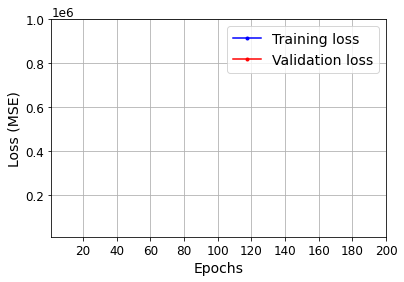

In [81]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [82]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.LSTM(128, activation='relu', input_shape=[None, 1]),
    keras.layers.Dense(7)
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid))

Epoch 1/200
70/70 [==============================] - 4s 36ms/step - loss: 14674371.0000 - val_loss: 288572992.0000
Epoch 2/200
70/70 [==============================] - 2s 34ms/step - loss: 8382022.5000 - val_loss: 139294096.0000
Epoch 3/200
70/70 [==============================] - 2s 34ms/step - loss: 5990356.0000 - val_loss: 127698416.0000
Epoch 4/200
70/70 [==============================] - 2s 34ms/step - loss: 5736720.5000 - val_loss: 159323664.0000
Epoch 5/200
70/70 [==============================] - 2s 33ms/step - loss: 4698538.5000 - val_loss: 39638448.0000
Epoch 6/200
70/70 [==============================] - 2s 33ms/step - loss: 4820868.5000 - val_loss: 33033888.0000
Epoch 7/200
70/70 [==============================] - 2s 36ms/step - loss: 7823300.0000 - val_loss: 341449952.0000
Epoch 8/200
70/70 [==============================] - 2s 35ms/step - loss: 12384342.0000 - val_loss: 54713980.0000
Epoch 9/200
70/70 [==============================] - 2s 33ms/step - loss: 2512223.0000 - 

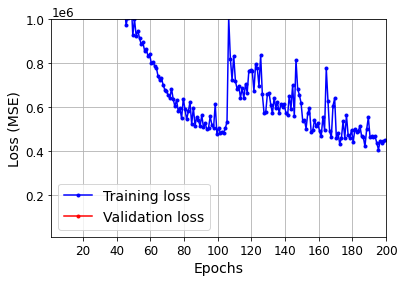

In [83]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [89]:
print(y_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

(554, 7, 1)
(554, 7)


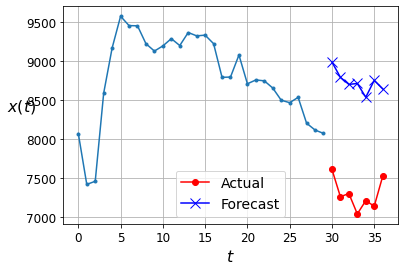

In [97]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :], "bx-", label="Forecast", markersize=10)
    #plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(loc='lower center',fontsize=14)

plot_multiple_forecasts(X_valid, y_valid, y_pred)

---
## (Simple & Easy!) Lab activity 3

### Write your sequential modeling code to forecast the closing price of the Ethereum!